<a href="https://colab.research.google.com/github/krish-baner/ibmq_2024/blob/main/Deployment_on_Quantum_Serverless(CPU%2BGPU%2BQPU)_4(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### Install Qiskit and relevant packages, if needed
### IMPORTANT: Make sure you are on 3.10 > python < 3.12
%pip install qiskit[visualization]==1.0.2
%pip install qiskit-ibm-runtime
%pip install qiskit-aer
%pip install graphviz
%pip install qiskit-serverless -U
%pip install qiskit-transpiler-service -U
%pip install git+https://github.com/qiskit-community/Quantum-Challenge-Grader.git -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 6.8 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=29d1e415902d8b2f54ca7d0d0f6599e5d85ac466f392b79651312e3c15818db2
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.0/524.0 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 19.5 MB/s eta 0:00:00
  Cloning https://github.com/qiskit-community/Quantum-Challenge-Grader.git to /tmp/pip-req-build-ra2mfyf1
  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/Quantum-Challenge-Grader.git /tmp/pip-req-build-ra2mfyf1
  Resolved https://github.com/qiskit-community/Quantum-Challenge-Grader.git to commit 312470070302f108cc55b67142b6fd083e844904
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 73.1 MB/s eta 0:00:00
  Using cached qiskit-1.0.2-cp38-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (5.6 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.7/134.7 kB 17.2 MB/s eta 0:00:0

In [2]:
%set_env QXToken=429db814fe4e0f877543727ae60ab03ae6f9875e14bd9916fb182427bb590a4e1a41801127a80052cff445f674efe7747f78ac3c4119c03f38ab5b13281abd3a

env: QXToken=429db814fe4e0f877543727ae60ab03ae6f9875e14bd9916fb182427bb590a4e1a41801127a80052cff445f674efe7747f78ac3c4119c03f38ab5b13281abd3a


In [3]:
# qc-grader should be 0.18.12 (or higher)
import qc_grader

qc_grader.__version__

'0.18.14'

In [4]:
# Import all in one cell

import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer as timer
import warnings

from qiskit import QuantumCircuit
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.circuit.random import random_circuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit.library import TwoLocal, EfficientSU2
from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Session, Options
from qiskit_serverless import QiskitFunction, save_result, get_arguments, save_result, distribute_task, distribute_qiskit_function, IBMServerlessClient, QiskitFunction
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_transpiler_service.transpiler_service import TranspilerService
from qiskit_aer import AerSimulator

In [5]:
# Import for grader
from qc_grader.challenges.iqc_2024 import grade_lab3_qs_ex1, grade_lab3_qs_ex2

In [7]:
from qiskit_ibm_runtime import QiskitRuntimeService

# Save an Ibm Quantum Account & make it your default account
QiskitRuntimeService.save_account(
    channel="ibm_quantum",
    token="429db814fe4e0f877543727ae60ab03ae6f9875e14bd9916fb182427bb590a4e1a41801127a80052cff445f674efe7747f78ac3c4119c03f38ab5b13281abd3a",
    set_as_default=True,
    # Use `overwrite=True` if you're updating your token.
    overwrite=True,
)

# Load saved credentials
service = QiskitRuntimeService()

# Specify a system to use for transpilation, DO NOT CHANGE

real_backend = service.backend("ibm_brisbane")

In [8]:
# Qiskit Pattern Step 1: Map quantum circuits and operators (Define Ansatz and operators)
num_qubits = 3
rotation_blocks = ['ry','rz'] # Add your code here
entanglement_blocks = 'cz' # Add your code here
entanglement = 'full' # Add your code here
reps = 1
insert_barriers = True

# Define Ansatz
ansatz = TwoLocal(num_qubits=num_qubits, rotation_blocks=rotation_blocks, entanglement_blocks=entanglement_blocks, entanglement=entanglement, reps=reps, insert_barriers=insert_barriers) # Add your code here

# Define parameters
num_params = ansatz.num_parameters

# Qiskit Pattern Step 2: Optimize the circuit for quantum execution
optimization_level = 2
pm = generate_preset_pass_manager(backend=real_backend, optimization_level=optimization_level)
isa_circuit = pm.run(ansatz) # Add your code here

# Define Hamiltonian for VQE
pauli_op = SparsePauliOp(['ZII', 'IZI', 'IIZ'])
hamiltonian_isa = pauli_op.apply_layout(layout=isa_circuit.layout)

In [9]:
# Setup Qiskit Serverless Client and Qiskit Runtime client
client = IBMServerlessClient("429db814fe4e0f877543727ae60ab03ae6f9875e14bd9916fb182427bb590a4e1a41801127a80052cff445f674efe7747f78ac3c4119c03f38ab5b13281abd3a") # Add in your IBM Quantum Token to QiskitServerless Client

# For the challenge, we will be using QiskitRuntime Local testing mode. Change to True only if you wish to use real backend.
USE_RUNTIME_SERVICE = True

if USE_RUNTIME_SERVICE:
    service = QiskitRuntimeService(
        channel='ibm_quantum',
        verify=False
    )
else:
    service = None

In [13]:
# Define the Qiskit Function
if USE_RUNTIME_SERVICE:
    function = QiskitFunction(title= "vqe", entrypoint="vqe.py", working_dir="/content/drive/MyDrive/Colab Notebooks")
else:
    function = QiskitFunction(title= "vqe" , entrypoint="vqe.py", working_dir="/content/drive/MyDrive/Colab Notebooks",  dependencies=["qiskit_aer"])

In [11]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [12]:
!ls "/content/drive/MyDrive/Colab Notebooks"

'687 Grid_World_RL_Agent[Krishanu Bandyopadhyay : BMC202230].ipynb'
'687_Grid_World_RL_Agent[Krishanu_Bandyopadhyay_BMC202230].ipynb'
'AI_enabled_transpilation_circuit depth & gate count opt with RL-4(1) .ipynb'
 artifact.tar
 assign1.ipynb
 Assignment3.ipynb
'Copy of notebook_week_2.ipynb'
'Copy of Untitled0.ipynb'
'IBM_Quantum Challenge-1.ipynb'
 IBM_Quantum_VQE-2.ipynb
 Iqhack_challange.ipynb
'Krishanu Bandyopadhyay_Asgnt(2).ipynb'
'lab-2 (1).ipynb'
 lab-3-circuit-knitting.ipynb
 lab-3-serverless.ipynb
'Lab 3 Serverless.ipynb'
'lab-4 (1).ipynb'
 lab-4.ipynb
 Project3quantum.ipynb
'Stack File oerations.ipynb'
 Untitled0.ipynb
 Untitled1.ipynb
 Untitled2.ipynb
 Untitled3.ipynb
 Untitled4.ipynb
 Untitled5.ipynb
 Untitled6.ipynb
 Untitled7.ipynb
 Untitled9.ipynb
 Variational_Quantum_Classifier_on_real_QPU-5.ipynb
 vqe.py


In [14]:
# Upload the Qiskit Function using IBMServerlessClient
client.upload(function)

'vqe'

In [15]:
# Define input_arguments
input_arguments = {
    "ansatz": isa_circuit, # Replace with your transpiled ansatz
    "operator": hamiltonian_isa, # Replace with the hamiltonian operator
    "method": "COBYLA", # Using COBYLA method for the optimizer
    "service": service # Add your code here
}

# Qiskit Pattern Step 3: Run the payload on backend
job = client.run("vqe", arguments= input_arguments)

In [16]:
# Submit your answer using following code

grade_lab3_qs_ex1(function, input_arguments, job)
# Expected result type: QiskitFunction, dict, Job

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [17]:
# Return jobid
job

<Job | 9396872c-8085-487f-8866-9b6711bd5ed8>

In [18]:
# Check job completion status
job.status()

'QUEUED'

In [19]:
# Monitor log
logs = job.logs()

for log in logs.splitlines():
    print(log)

No logs yet.


In [20]:
# Return result from QiskitFunction job
job.result()

{}

KeyError: 'iters'

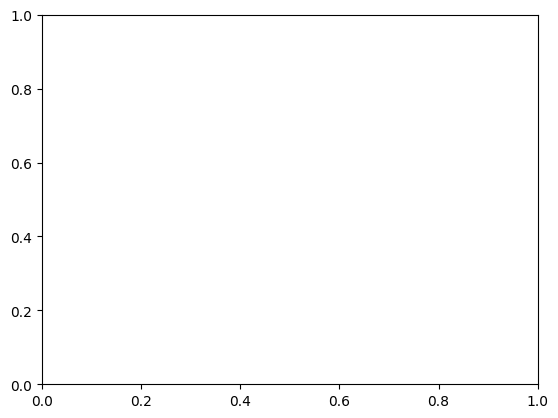

In [21]:
# Qiskit Pattern Step 4: Postprocess and analyze the Estimator V2 results
result = job.result()

fig, ax = plt.subplots()
plt.plot(range(result["iters"]), result["cost_history"])
plt.xlabel("Energy")
plt.ylabel("Cost")
plt.draw()

In [22]:
# Setup 3 circuits with Efficient SU2
num_qubits = [41, 51, 61]
circuits = [EfficientSU2(nq, su2_gates=["rz","ry"], entanglement="circular", reps=1).decompose() for nq in num_qubits]

In [23]:
from qiskit_ibm_runtime import QiskitRuntimeService

# Save an Ibm Quantum Account & make it your default account
QiskitRuntimeService.save_account(
    channel="ibm_quantum",
    token="b6ce976ae34fa83441518b4fb705a4eba366b0f8b8e467e597516d02bec32aaafb8d2505e4d297c080b070cc52194bceb5d95df1fa8ebcb9b99b2a8ffdc3ab84",
    set_as_default=True,
    # Use `overwrite=True` if you're updating your token.
    overwrite=True,
)

# Load saved credentials
service = QiskitRuntimeService()

# Specify a system to use for transpilation, DO NOT CHANGE

real_backend = service.backend("ibm_brisbane")

In [24]:
# Define Configs
optimization_levels = [1,2,3]
pass_managers = [{'pass_manager': generate_preset_pass_manager(optimization_level=level, backend=real_backend), 'optimization_level': level} for level in optimization_levels]

transpiler_services = [
        {'service': TranspilerService(backend_name="ibm_brisbane", optimization_level=3, ai="False"), 'ai': False, 'optimization_level': 3},
        {'service': TranspilerService(backend_name="ibm_brisbane", optimization_level=3, ai="True" ), 'ai': True, 'optimization_level': 3}
    ]

configs = pass_managers + transpiler_services

In [25]:
# Local transpilation setup
def transpile_parallel_local(circuit: QuantumCircuit, config):
    """Transpilation for an abstract circuit into an ISA circuit for a given config."""
    transpiled_circuit = config.run(circuit)
    return transpiled_circuit

In [26]:
# Run local transpilation
warnings.filterwarnings("ignore")

start = timer()

# Run transpilations locally for baseline
results = []
for circuit in circuits:
    for config in configs:
        if 'pass_manager' in config:
            results.append(transpile_parallel_local(circuit, config['pass_manager']))
        else:
            results.append(transpile_parallel_local(circuit, config['service']))

end = timer()

# Record local execution time
execution_time_local = end - start
print("Execution time locally: ", execution_time_local)

INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_tr

Execution time locally:  564.993001947


In [39]:
# Authenticate to the remote cluster and submit the pattern for remote execution if not done in previous exercise
serverless = IBMServerlessClient("429db814fe4e0f877543727ae60ab03ae6f9875e14bd9916fb182427bb590a4e1a41801127a80052cff445f674efe7747f78ac3c4119c03f38ab5b13281abd3a")

In [40]:
from qiskit_serverless import get_arguments, save_result, distribute_task, get

from qiskit import QuantumCircuit
from qiskit.primitives import Sampler

In [41]:
transpile_parallel_function = QiskitFunction(
    title="transpile_parallel",
    entrypoint="transpile_parallel.py",
    working_dir="/content/drive/MyDrive/Colab Notebooks",
    dependencies=["qiskit-transpiler-service"]
)

In [42]:
serverless.upload(transpile_parallel_function)

'transpile_parallel'

In [43]:
# Get list of functions
serverless.list()

[QiskitFunction(transpile_parallel), QiskitFunction(vqe)]

In [44]:
# Fetch the specific function titled "transpile_parallel"
transpile_parallel_serverless = serverless.get("transpile_parallel")

In [45]:
# Run the "transpile_parallel" function in the serverless environment
job = transpile_parallel_serverless.run(
    circuits=circuits, # Add your code here,
    backend_name= real_backend # Add your code here
                                       )

In [46]:
# Submit your answer using following code

grade_lab3_qs_ex2(optimization_levels, transpiler_services, transpile_parallel_function, transpile_parallel_serverless, job)
# Expected result type: list, list, QiskitFunction, QiskitFunction, Job

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


## BY ##
# Krishanu Bandyopadhyay #

## Thank You ##